In [4]:
import tensorflow as tf

x = tf.ones(shape=(2, 1))
print(x)

x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [5]:
import tensorflow as tf

# 정규 분포(normal distribution)
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

# 균등 분포(uniform distribution)
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[-0.10190451]
 [-0.31664956]
 [-0.85328025]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.06650317]
 [0.13679016]
 [0.38803875]], shape=(3, 1), dtype=float32)


In [6]:
import numpy as np

x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [7]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [8]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.3233921 ],
       [ 0.19989745],
       [ 0.1538406 ]], dtype=float32)>


In [9]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [10]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [11]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [12]:
a = tf.ones((2, 2))
b = tf.square(a)        # 제곱
c = tf.sqrt(a)          # 제곱근
d = b + c               # 두 텐서의 합(원소별 연산)
e = tf.matmul(a, b)     # 두 텐서의 점곱
e *= d                  # 두 텐서의 곱(원소별 연산)

In [13]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [14]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [15]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [16]:
num_samples_per_class = 1000
# 왼쪽 아래에서 오른쪽 위로 향하는 타원형의 포인트 클라우드에 첫 번째 클래스의 포인트 1,000개 생성
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
# 동일한 공분산 행렬에 다른 평균을 사용하여 다른 클래스의 포인트 생성
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

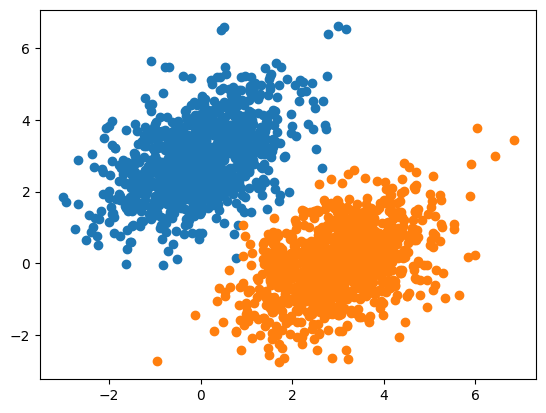

In [17]:
import matplotlib.pyplot as plt

plt.scatter(x=negative_samples[:, 0], y=negative_samples[:, 1])
plt.scatter(x=positive_samples[:, 0], y=positive_samples[:, 1])
plt.show()

In [18]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [19]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

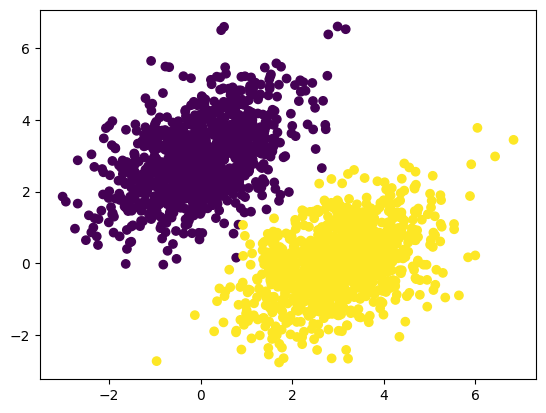

In [20]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [21]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

In [22]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [23]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [24]:
learning_rate = 0.1

def training_step(inputs, targets):
    # 정방향 패스
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    # 가중치에 대한 손실의 그레이디언트 계산
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # 가중치 업데이트
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    
    return loss

In [25]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 1.4511
1번째 스텝의 손실: 0.2270
2번째 스텝의 손실: 0.1230
3번째 스텝의 손실: 0.1043
4번째 스텝의 손실: 0.0964
5번째 스텝의 손실: 0.0903
6번째 스텝의 손실: 0.0848
7번째 스텝의 손실: 0.0798
8번째 스텝의 손실: 0.0753
9번째 스텝의 손실: 0.0711
10번째 스텝의 손실: 0.0673
11번째 스텝의 손실: 0.0638
12번째 스텝의 손실: 0.0607
13번째 스텝의 손실: 0.0578
14번째 스텝의 손실: 0.0552
15번째 스텝의 손실: 0.0528
16번째 스텝의 손실: 0.0506
17번째 스텝의 손실: 0.0485
18번째 스텝의 손실: 0.0467
19번째 스텝의 손실: 0.0450
20번째 스텝의 손실: 0.0435
21번째 스텝의 손실: 0.0421
22번째 스텝의 손실: 0.0408
23번째 스텝의 손실: 0.0397
24번째 스텝의 손실: 0.0386
25번째 스텝의 손실: 0.0377
26번째 스텝의 손실: 0.0368
27번째 스텝의 손실: 0.0360
28번째 스텝의 손실: 0.0352
29번째 스텝의 손실: 0.0345
30번째 스텝의 손실: 0.0339
31번째 스텝의 손실: 0.0334
32번째 스텝의 손실: 0.0329
33번째 스텝의 손실: 0.0324
34번째 스텝의 손실: 0.0320
35번째 스텝의 손실: 0.0316
36번째 스텝의 손실: 0.0312
37번째 스텝의 손실: 0.0309
38번째 스텝의 손실: 0.0306
39번째 스텝의 손실: 0.0303


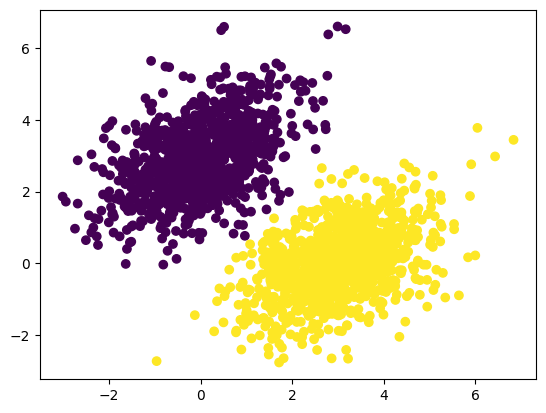

In [26]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

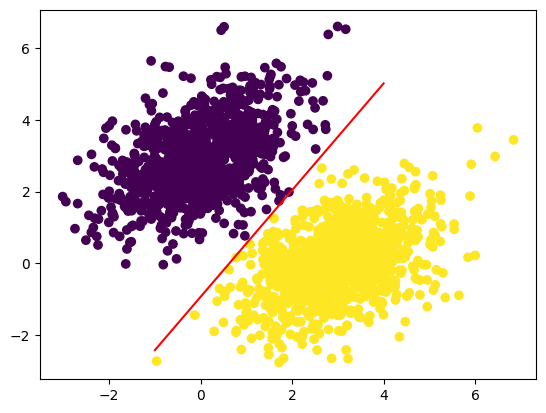

In [27]:
import numpy as np

x = np.linspace(-1, 4, 1000)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [28]:
from tensorflow import keras

# 모든 케라스 층은 Layer 클래스를 상속한다다
class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
        
    # build 메소드에서 가중치를 생성한다
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units, ),
                                 initializer="zeros")
        
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [29]:
# 선형 분류기 정의
model = keras.Sequential([keras.layers.Dense(1)])

model.compile(optimizer="rmsprop",          # 옵티마이저 지정
              loss="mean_squared_error",    # 손실 함수 지정
              metrics=["accuracy"])         # 측정 지표 지정

In [30]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5


16/16 [==============================] - 1s 3ms/step - loss: 1.7580 - accuracy: 0.5065
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 1.5563 - accuracy: 0.5065
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 1.3923 - accuracy: 0.5075
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 1.2429 - accuracy: 0.5075
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 1.1028 - accuracy: 0.5085


In [31]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 8ms/step - loss: 0.0891 - binary_accuracy: 0.9486 - val_loss: 0.0595 - val_binary_accuracy: 0.9867
Epoch 2/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0745 - binary_accuracy: 0.9521 - val_loss: 0.0853 - val_binary_accuracy: 0.9900
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0760 - binary_accuracy: 0.9564 - val_loss: 0.1428 - val_binary_accuracy: 0.7467
Epoch 4/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0676 - binary_accuracy: 0.9664 - val_loss: 0.0724 - val_binary_accuracy: 0.9867
Epoch 5/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0736 - binary_accuracy: 0.9514 - val_loss: 0.0462 - val_binary_accuracy: 0.9917


In [32]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

5/5 [==============================] - 0s 7ms/step - loss: 0.0462 - binary_accuracy: 0.9917


In [33]:
loss_and_metrics

[0.04617655277252197, 0.9916666746139526]